# Solutions

In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

# Question 1 solution

In [2]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)       
        self.bias = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
   
    def fit(self,X,y,num_epochs,lr=0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
    
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta)
            dbias = np.sum(beta, axis=0)
    
            # Gradient descent parameter update
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
            
        return 0


In [3]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

### Initialization

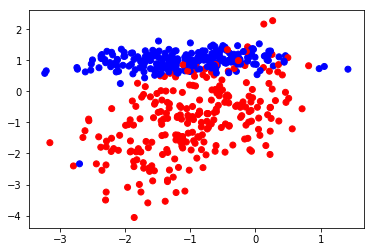

In [4]:
#1. Load and plot data
X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [5]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

### Train Classification Model

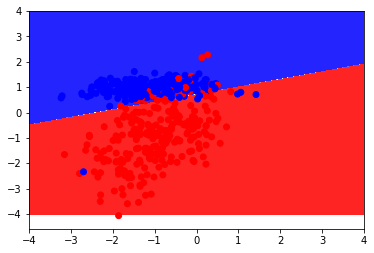

In [6]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.003)
plot_decision_boundary(logreg, X, y)

### Model Evaluation

In [7]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.93
CONFUSION MATRIX: 
 [[ 244.   29.]
 [   6.  221.]]


In [8]:
#5. compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.207170641735


# Question 2 solution

### Initialization

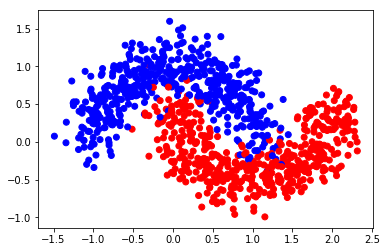

In [9]:
#1. Load and plot data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [10]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

### Train Classification Model

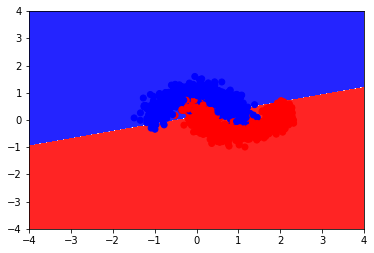

In [11]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.003)
plot_decision_boundary(logreg, X, y)

### Model Evaluation

In [12]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.875
CONFUSION MATRIX: 
 [[ 437.   62.]
 [  63.  438.]]


In [13]:
#5. compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.290882470401


# Question 3 solution 

### Logistic Regression Model

In [14]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        #weights from input to hidden layer
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim) 
        self.bias1 = np.zeros((1, hidden_dim))
        
        
        #weights from hidden layer to output layer
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        #layer 1 activation 
        a1 = X
        #dot product of inputs and weights(theta1) + layer 2 activation
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2)
        
        
        #dot product of output from hidden nodes and weights(theta2) + layer 3 activation
        z3 = np.dot(a2,self.theta2) + self.bias2
       
        a3 = np.tanh(z3)
        
        exp_z = np.exp(z3)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True) #predicted output
        one_hot_y = np.zeros((num_examples,np.max(y)+1)) #actual output
        
        #computes logarthimic loss per training example
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss) 
        
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        #layer 1 activation
        a1 = X
        
        #dot product of inputs and weights(theta1) + layer 2 activation
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2)
        
        #dot product of output from hidden nodes and weights(theta2) + layer 3 activation
        z3 = np.dot(a2,self.theta2) + self.bias2
        a3 = np.tanh(z3)
        
        exp_z = np.exp(z3)
        softmax_scores = exp_z /np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
   
    def fit(self,X,y,num_epochs,lr=0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            a1 = X
            z2 = np.dot(X,self.theta1) + self.bias1 #1000 X 4
            a2 = np.tanh(z2)
            #print(a2.shape)
            z3 = np.dot(a2,self.theta2) + self.bias2 #1000 X 2
            
            a3 = np.tanh(z3)
            exp_z3 = np.exp(z3)
            
            softmax_scores = exp_z3 /np.sum(exp_z3, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)  #1000 X 2
            one_hot_y = np.zeros_like(softmax_scores) # 1000 X 2
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            
            delta3 = softmax_scores - one_hot_y #1000 X 2
            prod = np.dot(self.theta2,np.transpose(delta3)) #4 X 1000

            delta2 = np.multiply(prod,np.transpose(1-(a2**2))) #4 X 1000
            delta2 = np.transpose(delta2) #1000 X 4
            
    
            # Compute gradients of model parameters
            dtheta2 = np.dot(np.transpose(a2),delta3) #4 X 2
            dtheta1 = np.dot(np.transpose(a1),delta2) #2 X 4
            
            dbias2 = np.sum(delta3, axis=0) #2 X 1
            dbias1 =np.sum(delta2, axis=0) #1 X 4
            
            # Gradient descent parameter update
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            self.theta1 -= lr * dtheta1
            self.bias1 -= lr * dbias1
           
        return 0


In [15]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

### Initialization

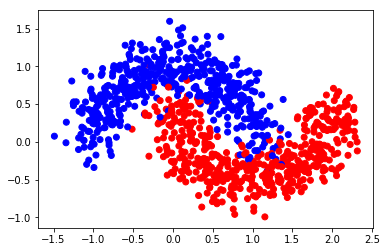

In [16]:
#1. Load and plot data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
#print(X.shape[0])
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
#print(y)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [17]:
#2. Initialize model
input_dim = np.shape(X)[1] #number of features per training example
#print(input_dim) 
output_dim = np.max(y) + 1 #gives the maximum value in the vector + 1
hidden_dim = 20
logreg = LogisticRegression(input_dim, output_dim, hidden_dim)

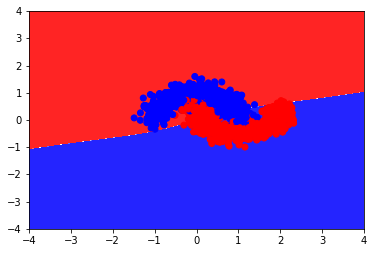

In [18]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

### Train Classification Model

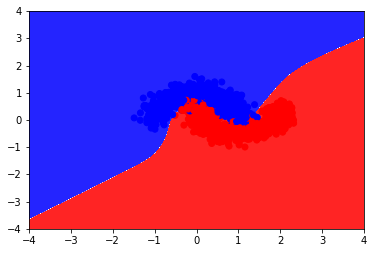

In [19]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.003)
plot_decision_boundary(logreg, X, y)

### Model Evaluation

In [20]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.97
CONFUSION MATRIX: 
 [[ 479.    9.]
 [  21.  491.]]


In [21]:
#5. compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.0808687491825


# Question 7 Solution 

### Logistic Regression Model 


In [22]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        #weights from input to hidden layer
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim) 
        self.bias1 = np.zeros((1, hidden_dim))
        
        
        #weights from hidden layer to output layer
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y, reg):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        #layer 1 activation 
        a1 = X
        #dot product of inputs and weights(theta1) + layer 2 activation
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2)
        
        #dot product of output from hidden nodes and weights(theta2) + layer 3 activation
        z3 = np.dot(a2,self.theta2) + self.bias2
        a3 = np.tanh(z3)
        exp_z = np.exp(z3)
        
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True) #predicted output
        one_hot_y = np.zeros((num_examples,np.max(y)+1)) #actual output
        
        #computes logarthimic loss per training example
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:]) 
        data_loss = np.sum(logloss) 
        
        #cost with L2 regularization term
        data_loss += reg/2 * (np.sum(np.square(self.theta1)) + np.sum(np.square(self.theta2)))
        
        return 1./num_examples * data_loss

    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        #layer 1 activation
        a1 = X
        
        #dot product of inputs and weights(theta1) + layer 2 activation
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2)
        
        #dot product of output from hidden nodes and weights(theta2) + layer 3 activation
        z3 = np.dot(a2,self.theta2) + self.bias2
        a3 = np.tanh(z3)
        
        exp_z = np.exp(z3)
        softmax_scores = exp_z /np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    def fit(self,X,y,num_epochs,lr=0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            a1 = X
            z2 = np.dot(X,self.theta1) + self.bias1 #1000 X 4
            a2 = np.tanh(z2)
            z3 = np.dot(a2,self.theta2) + self.bias2 #1000 X 2
            
            a3 = np.tanh(z3)
            exp_z3 = np.exp(z3)
            
            softmax_scores = exp_z3 /np.sum(exp_z3, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)  #1000 X 2
            one_hot_y = np.zeros_like(softmax_scores) # 1000 X 2
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            
            delta3 = softmax_scores - one_hot_y #1000 X 2
            
            prod = np.dot(self.theta2,np.transpose(delta3)) #4 X 1000
            delta2 = np.multiply(prod,np.transpose(1-(a2**2))) #4 X 1000
            delta2 = np.transpose(delta2) #1000 X 4
    
            # Compute gradients of model parameters
            dtheta2 = np.dot(np.transpose(a2),delta3) #4 X 2
            dtheta1 = np.dot(np.transpose(a1),delta2) #2 X 4
            
            dbias2 = np.sum(delta3, axis=0) #2 X 1
            dbias1 =np.sum(delta2, axis=0) #1 X 4
            
            # Gradient descent parameter update
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            self.theta1 -= lr * dtheta1
            self.bias1 -= lr * dbias1
            
            
            
        return 0


In [23]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

### Initialization

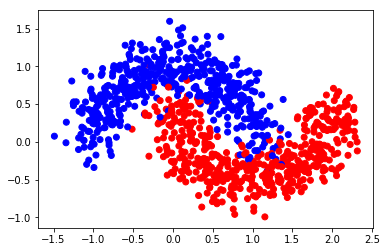

In [24]:
#1. Load and plot data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
#print(X.shape[0])
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
#print(y)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [25]:
#2. Initialize model
input_dim = np.shape(X)[1] #number of features per training example 
output_dim = np.max(y) + 1 #gives the maximum value in the vector + 1
hidden_dim = 20
logreg = LogisticRegression(input_dim, output_dim, hidden_dim)

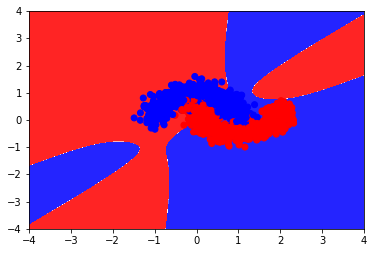

In [26]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

### Train Classification Model

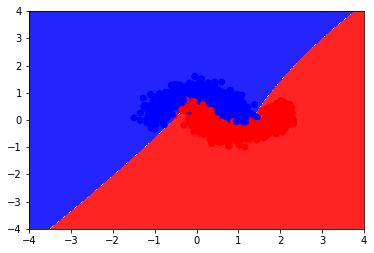

In [27]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.003)
plot_decision_boundary(logreg, X, y)

### Model Evaluation

In [28]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.965
CONFUSION MATRIX: 
 [[ 487.   22.]
 [  13.  478.]]


In [29]:
#5. compute cost
cost = logreg.compute_cost(X,y,reg=10)
print (cost)

0.737990050522


# Extra Credit

In [30]:
#1. Load and plot data
X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
#print(X.shape[0])
y = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
#print(y)
#plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
#plt.show()

In [31]:
#2. Initialize model
input_dim = np.shape(X)[1] #number of features per training example 
output_dim = np.max(y) + 1 #gives the maximum value in the vector + 1
hidden_dim = 20
logreg = LogisticRegression(input_dim, output_dim, hidden_dim)

In [32]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.003)

0

In [33]:
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9988864142538976
CONFUSION MATRIX: 
 [[ 90.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  91.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  91.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  92.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  89.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  91.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0.   0.  90.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  90.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  86.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  87.]]


In [34]:
#5. compute cost
cost = logreg.compute_cost(X,y,reg=10)
print (cost)

6.84927265354


### Test Data Evaluation

In [35]:
#1. Load and plot data
X = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
#print(X.shape[0])
y = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)
#print(y)
#plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
#plt.show()

In [36]:
#2. Initialize model
input_dim = np.shape(X)[1] #number of features per training example 
output_dim = np.max(y) + 1 #gives the maximum value in the vector + 1
hidden_dim = 20
logreg = LogisticRegression(input_dim, output_dim, hidden_dim)

In [37]:
#3. Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.003)

0

In [38]:
# Evaluation on testing data
#4. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9833147942157954
CONFUSION MATRIX: 
 [[ 88.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  91.   0.   0.   0.   0.   0.   0.   3.   1.]
 [  0.   0.  86.   2.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.  88.   0.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.  90.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  91.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  91.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  89.   0.   0.]
 [  0.   0.   0.   1.   2.   0.   0.   0.  84.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.  86.]]


In [39]:
#5. compute cost
cost = logreg.compute_cost(X,y,reg=10)
print (cost)

8.80328304239
